# CS 4661 Project

# Buy Or Sell a Stock? - Logistic Regression

In [2]:
# import necessary tools
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [3]:
# read dataset
stock_df = pd.read_csv("https://raw.githubusercontent.com/LyJacky/stocks/4802f4e0f139ee0568afbad309086d90c78a53b7/all_stocks_5yr.csv")
import datetime as dt
stock_df['date'] = pd.to_datetime(stock_df['date'])
stock_df['date']=stock_df['date'].map(dt.datetime.toordinal)
# gets the top 10 stocks in alphabetical order
# stock_df_top10 sstock_df_aal = stock_df[0:1259]tock_df[0:12590]

In [4]:
# stock_df_top10[::1259]
# stock_df['date']=stock_df['date'].map(dt.datetime.fromordinal)
# import pandas_ta
# get only AAL data


stock_df_aal = stock_df[0:1259]
# stock_df_aal.ta.ema(close='close', length=10, append=True)
stock_df_aal.insert(0,"weekly_avg", " ")
stock_df_aal.insert(0,"30_entry_avg", " ")
stock_df_aal.insert(0,"50_entry_avg", " ")
stock_df_aal.insert(0,"100_entry_avg", " ")
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,open,high,low,close,volume,Name
0,,,,,734907,15.07,15.12,14.63,14.75,8407500,AAL
1,,,,,734910,14.89,15.01,14.26,14.46,8882000,AAL
2,,,,,734911,14.45,14.51,14.10,14.27,8126000,AAL
3,,,,,734912,14.30,14.94,14.25,14.66,10259500,AAL
4,,,,,734913,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...,...,...,...,...
1254,,,,,736726,54.00,54.64,53.59,53.88,3623078,AAL
1255,,,,,736727,53.49,53.99,52.03,52.10,5109361,AAL
1256,,,,,736730,51.99,52.39,49.75,49.76,6878284,AAL
1257,,,,,736731,49.32,51.50,48.79,51.18,6782480,AAL


In [5]:
#populate new columns of the dataset
pd.options.mode.chained_assignment = None  # default='warn'
for x in range(7,1259):
    stock_df_aal["weekly_avg"][x] = stock_df_aal["close"][x-7:x].mean()
for x in range(37,1259):
    stock_df_aal["30_entry_avg"][x] = stock_df_aal["close"][x-30:x].mean()
for x in range(57,1259):
    stock_df_aal["50_entry_avg"][x] = stock_df_aal["close"][x-50:x].mean()
for x in range(107,1259):
    stock_df_aal["100_entry_avg"][x] = stock_df_aal["close"][x-100:x].mean()

stock_df_aal['10 Day Avg'] = stock_df_aal['close'].rolling(window=10).mean()
stock_df_aal['Corr'] = stock_df_aal['close'].rolling(window=10).corr(stock_df_aal['10 Day Avg'])
stock_df_aal['Open-Close'] = stock_df_aal['open'] - stock_df_aal['close'].shift(1)
stock_df_aal['Close-Open'] = stock_df_aal['close'] - stock_df_aal['open'] 
stock_df_aal['Open-Open'] = stock_df_aal['open'] - stock_df_aal['open'].shift(1)
stock_df_aal = stock_df_aal.dropna()
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,open,high,low,close,volume,Name,10 Day Avg,Corr,Open-Close,Close-Open,Open-Open
18,,,,13.747143,734934,14.70,14.93,14.50,14.82,9125300,AAL,13.764,-0.361020,0.13,0.12,0.18
19,,,,13.97,734935,14.99,15.20,14.84,14.92,10593700,AAL,13.899,-0.060018,0.17,-0.07,0.29
20,,,,14.185714,734938,14.85,15.15,14.71,15.13,6961800,AAL,14.110,0.521595,-0.07,0.28,-0.14
21,,,,14.428571,734939,15.14,15.60,14.95,15.50,8999100,AAL,14.334,0.789761,0.01,0.36,0.29
22,,,,14.698571,734940,15.54,16.20,15.48,15.91,11380000,AAL,14.584,0.903099,0.04,0.37,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,50.3245,52.286,54.097667,54.112857,736726,54.00,54.64,53.59,53.88,3623078,AAL,54.883,0.096612,-0.32,-0.12,0.92
1255,50.4273,52.4158,54.177333,53.482857,736727,53.49,53.99,52.03,52.10,5109361,AAL,54.287,0.376618,-0.39,-1.39,-0.51
1256,50.4897,52.504,54.199333,53.098571,736730,51.99,52.39,49.75,49.76,6878284,AAL,53.453,0.629746,-0.11,-2.23,-1.50
1257,50.5244,52.5262,54.127333,52.628571,736731,49.32,51.50,48.79,51.18,6782480,AAL,52.742,0.703482,-0.44,1.86,-2.67


In [6]:
stock_df_aal['Buy or Sell'] = np.where(stock_df_aal['Close-Open'] < 0,1,-1)
# -1 indicates we should sell the stock
# 1 indicates we should buy the stock
stock_df_aal


,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,open,high,low,close,volume,Name,10 Day Avg,Corr,Open-Close,Close-Open,Open-Open,Buy or Sell
18,,,,13.747143,734934,14.70,14.93,14.50,14.82,9125300,AAL,13.764,-0.361020,0.13,0.12,0.18,-1
19,,,,13.97,734935,14.99,15.20,14.84,14.92,10593700,AAL,13.899,-0.060018,0.17,-0.07,0.29,1
20,,,,14.185714,734938,14.85,15.15,14.71,15.13,6961800,AAL,14.110,0.521595,-0.07,0.28,-0.14,-1
21,,,,14.428571,734939,15.14,15.60,14.95,15.50,8999100,AAL,14.334,0.789761,0.01,0.36,0.29,-1
22,,,,14.698571,734940,15.54,16.20,15.48,15.91,11380000,AAL,14.584,0.903099,0.04,0.37,0.40,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,50.3245,52.286,54.097667,54.112857,736726,54.00,54.64,53.59,53.88,3623078,AAL,54.883,0.096612,-0.32,-0.12,0.92,1
1255,50.4273,52.4158,54.177333,53.482857,736727,53.49,53.99,52.03,52.10,5109361,AAL,54.287,0.376618,-0.39,-1.39,-0.51,1
1256,50.4897,52.504,54.199333,53.098571,736730,51.99,52.39,49.75,49.76,6878284,AAL,53.453,0.629746,-0.11,-2.23,-1.50,1
1257,50.5244,52.5262,54.127333,52.628571,736731,49.32,51.50,48.79,51.18,6782480,AAL,52.742,0.703482,-0.44,1.86,-2.67,-1


In [7]:
stock_df_aal = stock_df_aal[107:1259]
stock_df_aal

,100_entry_avg,50_entry_avg,30_entry_avg,weekly_avg,date,open,high,low,close,volume,Name,10 Day Avg,Corr,Open-Close,Close-Open,Open-Open,Buy or Sell
125,17.2359,17.5908,17.953,19.115714,735088,18.99,19.13,18.90,18.98,4269900,AAL,19.111,-0.526475,0.12,-0.01,0.15,1
126,17.2628,17.6138,18.046667,19.084286,735089,18.91,19.08,18.56,18.60,4720600,AAL,19.062,-0.695065,-0.07,-0.31,-0.08,1
127,17.281,17.6324,18.123,18.977143,735092,18.49,18.88,18.07,18.82,4674800,AAL,19.021,-0.727778,-0.11,0.33,-0.42,-1
128,17.2969,17.6574,18.203,18.897143,735093,18.86,18.95,16.29,16.36,78591200,AAL,18.737,0.270921,0.04,-2.50,0.37,1
129,17.2905,17.63,18.188333,18.531429,735094,16.05,16.34,15.35,16.17,28026200,AAL,18.419,0.768002,-0.31,0.12,-2.81,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,50.3245,52.286,54.097667,54.112857,736726,54.00,54.64,53.59,53.88,3623078,AAL,54.883,0.096612,-0.32,-0.12,0.92,1
1255,50.4273,52.4158,54.177333,53.482857,736727,53.49,53.99,52.03,52.10,5109361,AAL,54.287,0.376618,-0.39,-1.39,-0.51,1
1256,50.4897,52.504,54.199333,53.098571,736730,51.99,52.39,49.75,49.76,6878284,AAL,53.453,0.629746,-0.11,-2.23,-1.50,1
1257,50.5244,52.5262,54.127333,52.628571,736731,49.32,51.50,48.79,51.18,6782480,AAL,52.742,0.703482,-0.44,1.86,-2.67,-1


<AxesSubplot:>

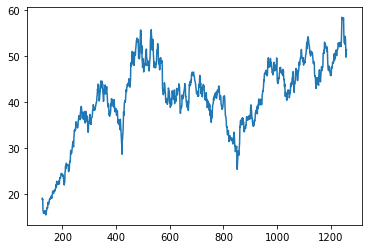

In [8]:
# Shows the closing prices of the stock in the past 3 years
stock_df_aal.close.plot()

In [9]:
# Split data into feature set and target set
feature_cols_1 = ["date","100_entry_avg","50_entry_avg","30_entry_avg","weekly_avg"]
feature_cols_2 = ["date","open", "10 Day Avg", "Corr", "Open-Close", "Open-Open"]

# features variable (X)
X_all_1 = scale(stock_df_aal[feature_cols_1])
X_all_2 = scale(stock_df_aal[feature_cols_2])

# target variables (y)
y = stock_df_aal["Buy or Sell"]



In [10]:
# split data into training and testing
import math
s_f = .6
n_train = math.floor(s_f * X_all_1.shape[0])
n_test = math.ceil((1-s_f) * X_all_1.shape[0])

X_train_all_1 = X_all_1[:n_train]
y_train_all_1 = y[:n_train]
X_test_all_1 = X_all_1[n_train:]
y_test_all_1 = y[n_train:]

X_train_all_2 = X_all_2[:n_train]
y_train_all_2 = y[:n_train]
X_test_all_2 = X_all_2[n_train:]
y_test_all_2 = y[n_train:]


print(X_train_all_1.shape)
print(X_test_all_2.shape)
print(y_train_all_1.shape)
print(y_test_all_2.shape)

(680, 5)
(454, 6)
(680,)
(454,)


In [11]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Use logistic regression on the "date","100_entry_avg","50_entry_avg","30_entry_avg","weekly_avg" features
log_regression_all_1 = LogisticRegression()


log_regression_all_1.fit(X_train_all_1,y_train_all_1)
y_predict_all_1 = log_regression_all_1.predict(X_test_all_1)
print(y_predict_all_1)
accuracy = accuracy_score(y_predict_all_1,y_test_all_1)
print(accuracy)


[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

In [12]:
# Use logistic regression on the "date","open", "10 Day Avg", "Corr", "Open-Close", "Open-Open" features
log_regression_all_2 = LogisticRegression()


log_regression_all_2.fit(X_train_all_2,y_train_all_2)
y_predict_all_2 = log_regression_all_2.predict(X_test_all_2)
print(y_predict_all_2)
accuracy = accuracy_score(y_predict_all_2,y_test_all_2)
print(accuracy)

[ 1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1  1  1  1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1 -1 -1
 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1  1 -1  1 -1 -1  1
  1  1 -1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1
  1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1  1
  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
  1 -1  1  1  1  1  1 -1 -1 -1  1 -1  1  1  1  1  1

In [16]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_1 = log_regression_all_1.predict_proba(X_test_all_1)
y_predict_prob_2 = log_regression_all_2.predict_proba(X_test_all_2)

# True Positive Rate (TPR) and False Positive Rate (FPR):

In [17]:
from sklearn import metrics

fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test_all_1, y_predict_prob_1[:,1], pos_label=1)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test_all_2, y_predict_prob_2[:,1], pos_label=1)

print(fpr1)
print(tpr1)
print(fpr1)
print(tpr1)


[0.         0.00440529 0.00440529 0.00881057 0.00881057 0.01321586
 0.01321586 0.02202643 0.02202643 0.03524229 0.03524229 0.03964758
 0.03964758 0.05726872 0.05726872 0.07048458 0.07048458 0.07488987
 0.07488987 0.07929515 0.07929515 0.08810573 0.08810573 0.10132159
 0.10132159 0.10572687 0.10572687 0.12334802 0.12334802 0.13656388
 0.13656388 0.14096916 0.14096916 0.14537445 0.14537445 0.15418502
 0.15418502 0.15859031 0.15859031 0.16740088 0.16740088 0.18061674
 0.18061674 0.18942731 0.18942731 0.19823789 0.19823789 0.20264317
 0.20264317 0.21585903 0.21585903 0.22026432 0.22026432 0.23788546
 0.23788546 0.24229075 0.24229075 0.25110132 0.25110132 0.25550661
 0.25550661 0.27312775 0.27312775 0.29955947 0.29955947 0.31277533
 0.31277533 0.31718062 0.31718062 0.3215859  0.3215859  0.32599119
 0.32599119 0.33039648 0.33039648 0.33480176 0.33480176 0.34361233
 0.34361233 0.35242291 0.35242291 0.37004405 0.37004405 0.3876652
 0.3876652  0.39207048 0.39207048 0.39647577 0.39647577 0.40088

With that said, this logistic regression prediction is slightly better than the 50 50 chance of guessing a rise or drop in price. 

# AUC:

In [19]:
AUC1 = metrics.auc(fpr1, tpr1)
print(AUC1)

AUC2 = metrics.auc(fpr2, tpr2)
print(AUC2)

0.563896058530148
0.5191057462787945


# ROC Curve:

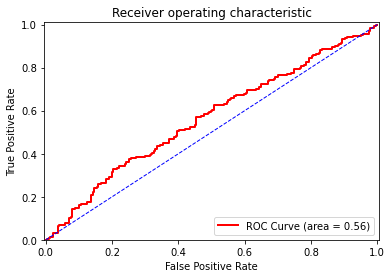

In [21]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr1, tpr1, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC1)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

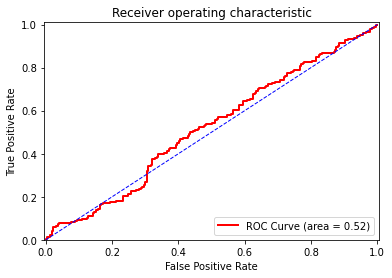

In [22]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr2, tpr2, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC2)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()